### Logistic Regression
Predict the class of breast cancer (malignant or ‘bad’ versus benign or ‘good’) from the features of images taken from breast samples. Ten biological attributes of the cancer cell nuclei have been calculated from the images, as described below:
###     Attribute	
    Sample code number	              id number

    Clump Thickness	                  1 - 10
    
    Uniformity of Cell Size	          1 - 10
    
    Uniformity of Cell Shape 	        1 - 10
    
    Marginal Adhesion	                1 - 10
    
    Single Epithelial Cell Size    	  1 - 10
    
    Bare Nuclei	                      1 - 10

    Bland Chromatin	                  1 - 10

    Normal Nucleoli	                  1 - 10

    Mitoses	                          1 - 10
    
    Class   	                         (2 for benign, 4 for malignant)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cancer = pd.read_csv("data/cancer.data", header=None)

In [3]:
cancer.head(2)

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2


#### Renaming Columns
The cancer dataset shows that the columns are unnamed, so i will rename the columns where 0 be "Sample_code_number", 1 is "Clump_Thickness", 2 is "Uniformity_of_Cell_Size", 3 is "Uniformity_of_Cell_Shape", 4 is "Marginal_Adhesion", 5 is "Single_Epithelial_Cell_Size", 6 is "Bare_Nuclei", 7 is "Bland_Chromatin", 8 is "Normal_Nucleoli", 9 is "Mitoses" and 10 is "Class" 

In [4]:
cancer.rename(columns={0:'Sample_code_number',1:"Clump_Thickness",2:"Uniformity_of_Cell_Size",3:"Uniformity_of_Cell_Shape",
4:"Marginal_Adhesion",
5:"Single_Epithelial_Cell_Size", 6:"Bare_Nuclei",
7:"Bland_Chromatin", 8:"Normal_Nucleoli", 9:"Mitoses",10:"Class"}, inplace=True)
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
Sample_code_number             699 non-null int64
Clump_Thickness                699 non-null int64
Uniformity_of_Cell_Size        699 non-null int64
Uniformity_of_Cell_Shape       699 non-null int64
Marginal_Adhesion              699 non-null int64
Single_Epithelial_Cell_Size    699 non-null int64
Bare_Nuclei                    699 non-null object
Bland_Chromatin                699 non-null int64
Normal_Nucleoli                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


The cancer dataset has 699 rows and 11 columns, the columns has zero null values, the following columns "Sample_code_number", "Clump_Thickness", "Uniformity_of_Cell_Size", "Uniformity_of_Cell_Shape", "Marginal_Adhesion", "Single_Epithelial_Cell_Size", "Bland_Chromatin", "Normal_Nucleoli", "Mitoses" and "Class" are intergers and column Bare_Nuclei is an object. 

In [5]:
for col in cancer.columns:
    print(cancer[col].value_counts())

1182404    6
1276091    5
1198641    3
466906     2
1116116    2
1070935    2
385103     2
1293439    2
1240603    2
1277792    2
1168736    2
560680     2
1174057    2
822829     2
320675     2
897471     2
1114570    2
1339781    2
654546     2
704097     2
1017023    2
734111     2
1354840    2
769612     2
411453     2
1158247    2
1321942    2
1061990    2
733639     2
1218860    2
          ..
1096352    1
255644     1
1201870    1
1169049    1
1041043    1
1190546    1
1071760    1
797327     1
1293966    1
1214092    1
1184241    1
432809     1
1201834    1
1125035    1
888523     1
1182410    1
640712     1
1018561    1
1336798    1
1091262    1
1173216    1
1286943    1
1319609    1
1172152    1
558538     1
1207986    1
1302428    1
857774     1
1181356    1
625201     1
Name: Sample_code_number, Length: 645, dtype: int64
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: Clump_Thickness, dtype: int64
1     384
10     67

The Sample_code_number column has duplicates which means that we have a number of individuals tested more that once meaning we might have duplicated rows. The bare_Nuclei column has unusual values

#### Droping duplicated Rows 

In [6]:
cancer.drop_duplicates(subset=None, keep='first', inplace=True)
cancer.shape

(691, 11)

The cancer data set now has 691 rows and 11 columns

### Handling unusual values and Changing columns astype
The unusual values found in column bare_nuclei, will be replaced by the most frequent value in bare_nuclei column and change the columns astype too interger

In [7]:
cancer = cancer.replace('?',cancer.Bare_Nuclei.value_counts().index[0]).astype(int)

In [8]:
cancer.describe()

,Sample_code_number,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,6.910000e+02,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,1.073333e+06,4.426918,3.130246,3.201158,2.824891,3.211288,3.479016,3.435601,2.882779,1.593343,2.688857
std,6.192953e+05,2.815861,3.041328,2.959886,2.866552,2.199852,3.615676,2.442345,3.066298,1.723129,0.951051
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.725490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238437e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [9]:
for col in cancer.columns:
    correlation=cancer[col].corr(cancer.Class)
    if correlation < 0.5:
        cancer.drop(col, axis=1, inplace=True)

#### Changing Class Values
Data is not binary and the target must be in the unit interval. Therefore i'll change the class values too:

2 for benign will be 0 and 4 for malignant will be 1

In [10]:
types={
    2:0,
    4:1
}
cancer['Class'] = cancer['Class'].map(types)

### Exploring Data

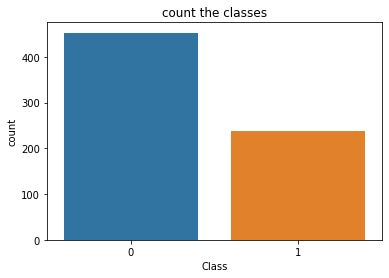

In [11]:
sns.countplot(x='Class', data=cancer)
plt.title("count the classes")
plt.show()

The cancer dataset favours benign this means that the model to be created will predict benign more than malignant

#### Spliting Data 
spliting data to train set and test set:

train 67%

test 33%

with random state of 42

In [12]:
from sklearn.model_selection import train_test_split
X = cancer.iloc[:,:8] 
y = cancer.Class
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

#### Instantiate a LogisticRegression classifier with default parameter values
Fitting logistic regresion model to train set

In [13]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression
# Instantiate a LogisticRegression classifier with default parameter values
logreg = LogisticRegression(random_state=42,solver='lbfgs')
# Fit logreg to the train set
model = logreg.fit(X_train, y_train)
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_test_pred=model.predict(X_test)
y_train_pred=model.predict(X_train)

### finding the best params for Logistic regression model
using GridSearchCV from sklearn.model_selection

In [15]:
# Define the grid of values for tol and max_iter
tol = [0.01, 0.001, 0.0001]
max_iter = [100,150,200]

# Create a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol, max_iter=max_iter)

In [16]:
# Import GridSearchCV
from sklearn.model_selection import GridSearchCV

# Instantiate GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5)

# Fit data to grid_model
grid_model_result = grid_model.fit(X_train, y_train)

# Summarize results
best_score, best_params = grid_model_result.best_score_, grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.965368 using {'max_iter': 100, 'tol': 0.01}


#### Best features to predict malignant cancer
find Best variables significantly predict malignancy, p < 0.05 using pearsinr from scipy.stats

In [17]:
from scipy.stats import pearsonr
for Col in cancer.columns:
    p_value=pearsonr(cancer[Col],cancer.Class)[1]
    if p_value < 0.05:
        print(f'{Col:} {p_value}')

Clump_Thickness 4.7049980385739965e-110
Uniformity_of_Cell_Size 2.0023333613820316e-167
Uniformity_of_Cell_Shape 2.094585964602499e-167
Marginal_Adhesion 2.1349333378114299e-103
Single_Epithelial_Cell_Size 2.1094825270985378e-95
Bare_Nuclei 9.754065706568776e-167
Bland_Chromatin 2.957329851163808e-129
Normal_Nucleoli 1.9444463463272824e-109
Class 0.0


#### Classification Report
The accuracy, precision, recall and F1-score of the model on the training and test data.

In [18]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print(f"Test Accuracy Score {accuracy_score(y_test,y_test_pred)}")
print(classification_report(y_test,y_test_pred))
print(f"Train Accuracy Score {accuracy_score(y_train,y_train_pred)}")
print(classification_report(y_train,y_train_pred))

Test Accuracy Score 0.9606986899563319
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       161
           1       0.97      0.90      0.93        68

    accuracy                           0.96       229
   macro avg       0.96      0.94      0.95       229
weighted avg       0.96      0.96      0.96       229

Train Accuracy Score 0.9675324675324676
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       292
           1       0.95      0.96      0.96       170

    accuracy                           0.97       462
   macro avg       0.96      0.97      0.97       462
weighted avg       0.97      0.97      0.97       462



#### Confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix
# Print the confusion matrix of the decision tree model
pd.DataFrame(confusion_matrix(y_test, y_test_pred), index=[2, 4], columns=[" benign","malignant"])

,benign,malignant
2,159,2
4,7,61


#### ROC 
Receiver Operating Characteristic (ROC) curve on the test data.

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.997


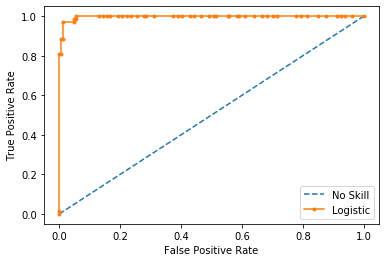

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

#### Overdispersion

is measure of spread in dataset 